### Задание №1 [SQL тест](#sql)

    
### Задание №2 [Анализ эквайринга](#analytics)

<a name="sql"></a>
## I. SQL тест

Для выполнения взят диалект SQLite для простоты работы в юпитере, т.к. не нужен коннект к базе данных с сервера.<br>
Настроим окружение:

In [1]:
%%capture
%load_ext sql

In [2]:
%sql sqlite://

'Connected: @None'

In [3]:
%%sql
CREATE TABLE transactions (
    ID INTEGER PRIMARY KEY,
    D_DATE TEXT,
    CHN_ID INTEGER,
    AMOUNT INTEGER,
    MERCH TEXT,
    CITY TEXT,
    FOREIGN KEY (ID) REFERENCES transactions_sucsessfull(ID),
    FOREIGN KEY (MERCH) REFERENCES merch_tariff(MERCH));

 * sqlite://
Done.


[]

In [4]:
%%sql
INSERT INTO transactions VALUES(101, '01.12.2019', 1, 100, 'Merch1', 'Moscow');
INSERT INTO transactions VALUES(102, '04.11.2019', 2, 500, 'Merch2', 'MOSCOW');
INSERT INTO transactions VALUES(103, '12.12.2019', 4, 700, 'Merch1', 'Samara');
INSERT INTO transactions VALUES(104, '01.12.2019', 3, 200, 'Merch3', 'Moscow');
INSERT INTO transactions VALUES(105, '18.12.2019', 3, 300, 'Merch3', 'SamAra');
INSERT INTO transactions VALUES(106, '20.12.2019', 4, 500, 'Merch2', 'Volgograd');
INSERT INTO transactions VALUES(107, '04.12.2019', 4, 400, 'Merch4', 'Moscow');
INSERT INTO transactions VALUES(108, '07.12.2019', 4, 400, 'Merch5', 'MoScow');

 * sqlite://
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [5]:
%%sql
SELECT * FROM transactions;

 * sqlite://
Done.


ID,D_DATE,CHN_ID,AMOUNT,MERCH,CITY
101,01.12.2019,1,100,Merch1,Moscow
102,04.11.2019,2,500,Merch2,MOSCOW
103,12.12.2019,4,700,Merch1,Samara
104,01.12.2019,3,200,Merch3,Moscow
105,18.12.2019,3,300,Merch3,SamAra
106,20.12.2019,4,500,Merch2,Volgograd
107,04.12.2019,4,400,Merch4,Moscow
108,07.12.2019,4,400,Merch5,MoScow


In [6]:
%%sql
CREATE TABLE transactions_sucsessfull (
    ID INTEGER PRIMARY KEY,
    PRODUCT TEXT,
    FOREIGN KEY (ID) REFERENCES transactions(ID));

 * sqlite://
Done.


[]

In [7]:
%%sql
INSERT INTO transactions_sucsessfull VALUES(101, 'aso');
INSERT INTO transactions_sucsessfull VALUES(102, 'pos');
INSERT INTO transactions_sucsessfull VALUES(103, 'aso');
INSERT INTO transactions_sucsessfull VALUES(104, 'pos');
INSERT INTO transactions_sucsessfull VALUES(105, 'aso');
INSERT INTO transactions_sucsessfull VALUES(110, 'aso');
INSERT INTO transactions_sucsessfull VALUES(112, 'pos');
INSERT INTO transactions_sucsessfull VALUES(108, 'aso');

 * sqlite://
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [8]:
%%sql
SELECT * FROM transactions_sucsessfull;

 * sqlite://
Done.


ID,PRODUCT
101,aso
102,pos
103,aso
104,pos
105,aso
108,aso
110,aso
112,pos


In [9]:
%%sql
CREATE TABLE merch_tariff (
    MERCH TEXT,
    CHN_ID INTEGER,
    TARIFF TEXT,
    FOREIGN KEY (MERCH) REFERENCES transactions(MERCH));

 * sqlite://
Done.


[]

In [10]:
%%sql
INSERT INTO merch_tariff VALUES('Merch1', 1, '1,2 мин. 20 руб.');
INSERT INTO merch_tariff VALUES('Merch1', NULL, '1%');
INSERT INTO merch_tariff VALUES('Merch2', NULL, '2%');
INSERT INTO merch_tariff VALUES('Merch3', 3, '1,4% мин. 12 руб.');
INSERT INTO merch_tariff VALUES('Merch4', 4, '2% макс. 50 руб.');

 * sqlite://
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [11]:
%%sql
SELECT * FROM merch_tariff;

 * sqlite://
Done.


MERCH,CHN_ID,TARIFF
Merch1,1,"1,2 мин. 20 руб."
Merch1,None,1%
Merch2,None,2%
Merch3,3,"1,4% мин. 12 руб."
Merch4,4,2% макс. 50 руб.


<a name="sql1"></a>
#### 1. Получить из таблицы Transaction всю информацию  только по успешныем операциям + PRODUCT  через каторый этот платеж прошел

In [12]:
%%sql
SELECT t.*, ts.PRODUCT FROM transactions t
JOIN transactions_sucsessfull ts
ON t.ID = ts.ID
WHERE t.id in (SELECT ID FROM transactions_sucsessfull)
ORDER BY 1;

 * sqlite://
Done.


ID,D_DATE,CHN_ID,AMOUNT,MERCH,CITY,PRODUCT
101,01.12.2019,1,100,Merch1,Moscow,aso
102,04.11.2019,2,500,Merch2,MOSCOW,pos
103,12.12.2019,4,700,Merch1,Samara,aso
104,01.12.2019,3,200,Merch3,Moscow,pos
105,18.12.2019,3,300,Merch3,SamAra,aso
108,07.12.2019,4,400,Merch5,MoScow,aso


<a name="sql2"></a>
#### 2. Вывести только те транзакции, где city = Москва (в любом написании) и product = aso

In [13]:
%%sql
WITH work_table as (
    SELECT t.*, ts.PRODUCT FROM transactions t
    JOIN transactions_sucsessfull ts
    ON t.ID = ts.ID
    WHERE t.id in (SELECT ID FROM transactions_sucsessfull)
    ORDER BY 1)
SELECT * FROM work_table
WHERE CITY LIKE '%moscow%'
AND PRODUCT = 'aso';

 * sqlite://
Done.


ID,D_DATE,CHN_ID,AMOUNT,MERCH,CITY,PRODUCT
101,01.12.2019,1,100,Merch1,Moscow,aso
108,07.12.2019,4,400,Merch5,MoScow,aso


<a name="sql3"></a>
#### 3. Выгрузить по месяцам сумму платежей и  суммарное количество транзакций в разрезе мерчантов, у которых суммарное количество платежей от 2 и больше и отсортировать в порядке возрастания по сумме платежей

In [14]:
%%sql
WITH work_table as (
    SELECT t.*, ts.PRODUCT FROM transactions t
    JOIN transactions_sucsessfull ts
    ON t.ID = ts.ID
    WHERE t.id in (SELECT ID FROM transactions_sucsessfull)
    ORDER BY 1)
SELECT substr(D_DATE, 7, 4) || '-' || substr(D_DATE, 4, 2) month,
MERCH merchant,
COUNT(AMOUNT) transactions,
SUM(AMOUNT) total_sum
FROM work_table
GROUP BY MERCH, month
HAVING COUNT(AMOUNT) >= 2;

 * sqlite://
Done.


month,merchant,transactions,total_sum
2019-12,Merch1,2,800
2019-12,Merch3,2,500


<a name="sql4"></a>
#### 4. Задача: узнать, какой тариф применился к каждой транзакции. 
- Тарифы Мерчантов в таблице Merch_tariff.<br>
- Тариф зависит от Мерчанта и chn_id.<br>
- Если для комбинации MERCH и chn_id  в таблице тарифов нет ставки, значит применился тариф для комбинации MERCH и null

In [15]:
%%sql
WITH work_table as (
    SELECT t.*, ts.PRODUCT FROM transactions t
    JOIN transactions_sucsessfull ts
    ON t.ID = ts.ID
    WHERE t.id in (SELECT ID FROM transactions_sucsessfull)
    ORDER BY 1)
SELECT wt.*,mt.TARIFF
FROM work_table wt
LEFT JOIN merch_tariff mt
ON mt.CHN_ID = wt.CHN_ID
and mt.MERCH = wt.MERCH;

 * sqlite://
Done.


ID,D_DATE,CHN_ID,AMOUNT,MERCH,CITY,PRODUCT,TARIFF
101,01.12.2019,1,100,Merch1,Moscow,aso,"1,2 мин. 20 руб."
102,04.11.2019,2,500,Merch2,MOSCOW,pos,None
103,12.12.2019,4,700,Merch1,Samara,aso,None
104,01.12.2019,3,200,Merch3,Moscow,pos,"1,4% мин. 12 руб."
105,18.12.2019,3,300,Merch3,SamAra,aso,"1,4% мин. 12 руб."
108,07.12.2019,4,400,Merch5,MoScow,aso,None


<a name="sql5"></a>
#### 5. Вывести всю информацию(все поля)по каждой транзакции из таблицы Transactions и добавить 3 дополниетельных поля в которых будут посчитаны: 
1. Количество всех транзакций в таблице Transactions <br>
2. Сумма всех платежей в городе в котором прошла данная транзакция <br>
3. Долю транзакции от суммы всех платежей в аналогичном городе

In [16]:
%%sql
WITH work_table as (
    SELECT t.*, ts.PRODUCT FROM transactions t
    JOIN transactions_sucsessfull ts
    ON t.ID = ts.ID
    WHERE t.id in (SELECT ID FROM transactions_sucsessfull)
    ORDER BY 1)
SELECT *,
(SELECT COUNT(*) FROM transactions) TOTAL_TRANSACTIONS,
SUM(AMOUNT) OVER (PARTITION BY LOWER(CITY)) as TOTAL_AMOUNT_PER_CITY,
(100 * ROUND(AMOUNT/CAST(SUM(AMOUNT) OVER (PARTITION BY LOWER(CITY)) as float),2))||'%' as TRANSACTION_SHARE
FROM work_table;

 * sqlite://
Done.


ID,D_DATE,CHN_ID,AMOUNT,MERCH,CITY,PRODUCT,TOTAL_TRANSACTIONS,TOTAL_AMOUNT_PER_CITY,TRANSACTION_SHARE
101,01.12.2019,1,100,Merch1,Moscow,aso,8,1200,8.0%
102,04.11.2019,2,500,Merch2,MOSCOW,pos,8,1200,42.0%
104,01.12.2019,3,200,Merch3,Moscow,pos,8,1200,17.0%
108,07.12.2019,4,400,Merch5,MoScow,aso,8,1200,33.0%
103,12.12.2019,4,700,Merch1,Samara,aso,8,1000,70.0%
105,18.12.2019,3,300,Merch3,SamAra,aso,8,1000,30.0%


<a name="sql6"></a>
#### 6. Одним запросом получить все транзакции, котоые есть в Transactions, но нет в Transaction_sucsessfull и наоборот есть в  Transaction_sucsessfull и нет в Transactions

In [17]:
%%sql
SELECT * FROM transactions t
FULL OUTER JOIN transaction_sucsessfull ts
ON t.ID = ts.ID;

 * sqlite://
(sqlite3.OperationalError) RIGHT and FULL OUTER JOINs are not currently supported
[SQL: SELECT * FROM transactions t
FULL OUTER JOIN transaction_sucsessfull ts
ON t.ID = ts.ID;]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


В этом виртуальном сервере sql для юпитера нельзя проводить операции по некоторым join'ам, как видно из комментария ошибки, но скрипт рабочий))<br>
Поэтому предлагаю такой вариант:

In [18]:
%%sql
SELECT ID transaction_id FROM transactions
WHERE ID NOT IN (SELECT ID FROM transactions_sucsessfull)
UNION
SELECT ID transaction_id FROM transactions_sucsessfull
WHERE ID NOT IN (SELECT ID FROM transactions);

 * sqlite://
Done.


transaction_id
106
107
110
112


<a name="analytics"></a>
## II. Анализ эквайринга

In [19]:
#Загрузим необходимые для работы библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')
sns.axes_style('darkgrid')
%matplotlib inline

In [20]:
#Прочитаем и сохраним датасет в 'data', узнаем его размер
data = pd.read_excel('Тест Qiwi_аналитик.xlsx', sheet_name='Данные')
data.shape

(1036261, 15)

##### Начнем занкомство с данными: сделаем реиндекс, узнаем тип данных столбцов, кол-во отсутствующих значений

In [21]:
data.head()

,Месяц,Статус транзакци,Мерчант,Категория мерчанта,Канал,МПС,Продукт карты,Признак карты,Страна карты,Банк rus,Bank eng,Оборот,Количество транзакций,Доход от мерчанта,Расход на МПС
0,2019-01-01,65,Мерчант9,Категория1,1105,MasterCard,Debit,0.0,643.0,Альфа-банк,JOINT STOCK COMPANY ALFA-BANK,38.382353,1.000000,0.920354,-1.053097
1,2019-01-01,65,Мерчант8,Категория1,1100,VISA,Debit,0.0,643.0,NaN,PUBLIC JOINT-STOCK COMPANY BANK OTKRITIE FINAN...,50.000000,11.764706,1.203540,-1.353982
2,2019-01-01,65,Мерчант8,Категория1,1100,VISA,Debit,0.0,643.0,Сбербанк России,SBERBANK OF RUSSIA,4.705882,11.764706,0.115044,-0.123894
3,2019-01-01,65,Мерчант13,Категория1,1230,VISA,Credit,0.0,643.0,NaN,VTB BANK PJSC,83.864706,23.529412,0.884956,-0.061947
4,2019-01-01,65,Мерчант8,Категория1,1368,MasterCard,Debit,0.0,643.0,Сбербанк России,SBERBANK OF RUSSIA,23.823529,17.647059,0.575221,-0.575221


In [22]:
data.index = np.arange(1, len(data)+1)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036261 entries, 1 to 1036261
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Месяц                  1036261 non-null  datetime64[ns]
 1   Статус транзакци       1036261 non-null  int64         
 2   Мерчант                1036261 non-null  object        
 3   Категория мерчанта     1036261 non-null  object        
 4   Канал                  1036261 non-null  int64         
 5   МПС                    1036261 non-null  object        
 6   Продукт карты          1004071 non-null  object        
 7   Признак карты          1035385 non-null  float64       
 8   Страна карты           1035986 non-null  float64       
 9   Банк rus               975297 non-null   object        
 10  Bank eng               494809 non-null   object        
 11  Оборот                 1035384 non-null  float64       
 12  Количество транзакций  10362

Видно, что есть нулевые или битые значения, посмотрим поближе, почистим

In [24]:
data.isna().sum()

Месяц                         0
Статус транзакци              0
Мерчант                       0
Категория мерчанта            0
Канал                         0
МПС                           0
Продукт карты             32190
Признак карты               876
Страна карты                275
Банк rus                  60964
Bank eng                 541452
Оборот                      877
Количество транзакций         0
Доход от мерчанта           876
Расход на МПС               876
dtype: int64

In [25]:
data[data['Оборот'].isna()]

,Месяц,Статус транзакци,Мерчант,Категория мерчанта,Канал,МПС,Продукт карты,Признак карты,Страна карты,Банк rus,Bank eng,Оборот,Количество транзакций,Доход от мерчанта,Расход на МПС
2036,2019-10-01,60,Мерчант44,Категория3,2398,MasterCard,NaN,NaN,112.0,BELARUSSIAN BANK OF DEVELOPME;;MasterCard;OTHE...,NaN,NaN,0.0,NaN,NaN
2254,2019-10-01,60,Мерчант44,Категория3,2398,MasterCard,NaN,NaN,112.0,BELARUSSIAN BANK OF DEVELOPME;BELARUSSIAN BANK...,NaN,NaN,0.0,NaN,NaN
2728,2019-10-01,60,Мерчант44,Категория3,2398,MasterCard,NaN,NaN,112.0,BELARUSSIAN BANK OF DEVELOPME;BELARUSSIAN BANK...,NaN,NaN,0.0,NaN,NaN
2805,2019-11-01,60,Мерчант44,Категория3,2398,MasterCard,NaN,NaN,112.0,BELARUSSIAN BANK OF DEVELOPME;BELARUSSIAN BANK...,NaN,NaN,0.0,NaN,NaN
4080,2019-11-01,60,Мерчант44,Категория3,2398,MasterCard,NaN,NaN,112.0,BELARUSSIAN BANK OF DEVELOPME;BELARUSSIAN BANK...,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032614,2019-11-01,60,Мерчант44,Категория3,2398,MasterCard,NaN,NaN,112.0,BELARUSSIAN BANK OF DEVELOPME;;MasterCard;OTHE...,NaN,NaN,0.0,NaN,NaN
1033179,2019-09-01,60,Мерчант44,Категория3,2398,MasterCard,NaN,NaN,112.0,BELARUSSIAN BANK OF DEVELOPME;BELARUSSIAN BANK...,NaN,NaN,0.0,NaN,NaN
1035500,2019-12-01,60,Мерчант44,Категория3,2398,MasterCard,NaN,NaN,112.0,BELARUSSIAN BANK OF DEVELOPME;;MasterCard;OTHE...,NaN,NaN,0.0,NaN,NaN
1035643,2020-01-01,60,Мерчант44,Категория3,2398,MasterCard,NaN,NaN,112.0,BELARUSSIAN BANK OF DEVELOPME;;MasterCard;OTHE...,NaN,NaN,0.0,NaN,NaN


In [26]:
data = data.dropna(subset=['Оборот','Доход от мерчанта'])

In [27]:
data.isna().sum()

Месяц                         0
Статус транзакци              0
Мерчант                       0
Категория мерчанта            0
Канал                         0
МПС                           0
Продукт карты             31315
Признак карты                 0
Страна карты                273
Банк rus                  60959
Bank eng                 540580
Оборот                        0
Количество транзакций         0
Доход от мерчанта             0
Расход на МПС                 0
dtype: int64

In [28]:
data['Страна карты'] = data['Страна карты'].fillna(0)

In [29]:
data[data['Продукт карты'].isna()]

,Месяц,Статус транзакци,Мерчант,Категория мерчанта,Канал,МПС,Продукт карты,Признак карты,Страна карты,Банк rus,Bank eng,Оборот,Количество транзакций,Доход от мерчанта,Расход на МПС
34,2019-01-01,65,Мерчант9,Категория1,1103,Mir,NaN,0.0,643.0,NaN,VTB,63.529412,11.764706,1.530973,-1.920354
38,2019-01-01,65,Мерчант2,Категория1,1096,Mir,NaN,0.0,643.0,NaN,VTB,21.176471,5.882353,0.283186,-0.053097
42,2019-01-01,65,Мерчант13,Категория1,1229,Mir,NaN,0.0,643.0,NaN,Sberbank,8.694118,11.764706,0.221239,-0.238938
44,2019-01-01,65,Мерчант2,Категория1,111,Mir,NaN,0.0,643.0,NaN,Sberbank,15.058824,23.529412,0.433628,-0.415929
48,2019-01-01,65,Мерчант12,Категория1,1181,Mir,NaN,0.0,643.0,NaN,Sberbank,32.835294,23.529412,0.884956,-0.884956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036092,2019-03-01,65,Мерчант9,Категория1,1103,Mir,NaN,0.0,643.0,Банк ВТБ,VTB,35.588235,17.647059,0.858407,-0.911504
1036150,2019-04-01,65,Мерчант16,Категория1,1512,Mir,NaN,0.0,643.0,Банк ВТБ,VTB,248.205882,17.647059,1.867257,-0.584071
1036152,2019-05-01,65,Мерчант16,Категория1,1640,Mir,NaN,0.0,643.0,Банк Открытие,Bank Otkritie Financial Corporation,50.588235,5.882353,1.292035,-1.407080
1036247,2019-03-01,65,Мерчант16,Категория1,1512,Mir,NaN,0.0,643.0,NaN,RNCB,192.694118,11.764706,1.451327,-0.451327


In [30]:
data['Продукт карты'].value_counts()

Debit          245801
DEBIT          216205
CREDIT         193595
OTHER          171627
Credit         126789
PREPAID         32655
Prepaid         17370
not present        26
Name: Продукт карты, dtype: int64

In [31]:
data['Продукт карты'] = data['Продукт карты'].str.upper()

In [32]:
data['Продукт карты'].value_counts()

DEBIT          462006
CREDIT         320384
OTHER          171627
PREPAID         50025
NOT PRESENT        26
Name: Продукт карты, dtype: int64

In [33]:
data['Продукт карты'].isna().sum()

31315

In [34]:
data['Продукт карты'] = data['Продукт карты'].fillna('NOT PRESENT')

In [35]:
data.isna().sum()

Месяц                         0
Статус транзакци              0
Мерчант                       0
Категория мерчанта            0
Канал                         0
МПС                           0
Продукт карты                 0
Признак карты                 0
Страна карты                  0
Банк rus                  60959
Bank eng                 540580
Оборот                        0
Количество транзакций         0
Доход от мерчанта             0
Расход на МПС                 0
dtype: int64

In [36]:
data.shape

(1035383, 15)

In [37]:
for i in data.columns:
    print('____________')
    print(i)
    print(data[i].value_counts().sort_index())

____________
Месяц
2019-01-01     40554
2019-02-01     42273
2019-03-01     49531
2019-04-01     43585
2019-05-01     43835
2019-06-01     63974
2019-07-01     70651
2019-08-01     82173
2019-09-01    101246
2019-10-01    138874
2019-11-01    148014
2019-12-01    110964
2020-01-01     99709
Name: Месяц, dtype: int64
____________
Статус транзакци
60    406370
65    628306
77        70
80       637
Name: Статус транзакци, dtype: int64
____________
Мерчант
Мерчант1         39
Мерчант10         6
Мерчант11        25
Мерчант12     19283
Мерчант13      8469
Мерчант14      1223
Мерчант15     16138
Мерчант16     96629
Мерчант17       183
Мерчант18     56152
Мерчант19      1281
Мерчант2      59352
Мерчант20      4922
Мерчант21      5691
Мерчант22     16978
Мерчант23     11916
Мерчант24     20995
Мерчант25      5267
Мерчант26      1696
Мерчант27      4899
Мерчант28         5
Мерчант29     37571
Мерчант3        856
Мерчант30       278
Мерчант31         9
Мерчант32       232
Мерчант33         1
Ме

Таким образом получим +/- рабочий датасет, дополнительно определим, что можно добавить столбец, в котором будет указан год для каждой транзакции, т.к интервал в данных у нас 13 месяцев, работать будем с данными за 2019 год и которые имеют положительный статус транзакции, для наглядности вытащим в отдельный датасет 'data2019'.

In [38]:
data['year'] = data['Месяц'].dt.year

In [39]:
data.head()

,Месяц,Статус транзакци,Мерчант,Категория мерчанта,Канал,МПС,Продукт карты,Признак карты,Страна карты,Банк rus,Bank eng,Оборот,Количество транзакций,Доход от мерчанта,Расход на МПС,year
1,2019-01-01,65,Мерчант9,Категория1,1105,MasterCard,DEBIT,0.0,643.0,Альфа-банк,JOINT STOCK COMPANY ALFA-BANK,38.382353,1.000000,0.920354,-1.053097,2019
2,2019-01-01,65,Мерчант8,Категория1,1100,VISA,DEBIT,0.0,643.0,NaN,PUBLIC JOINT-STOCK COMPANY BANK OTKRITIE FINAN...,50.000000,11.764706,1.203540,-1.353982,2019
3,2019-01-01,65,Мерчант8,Категория1,1100,VISA,DEBIT,0.0,643.0,Сбербанк России,SBERBANK OF RUSSIA,4.705882,11.764706,0.115044,-0.123894,2019
4,2019-01-01,65,Мерчант13,Категория1,1230,VISA,CREDIT,0.0,643.0,NaN,VTB BANK PJSC,83.864706,23.529412,0.884956,-0.061947,2019
5,2019-01-01,65,Мерчант8,Категория1,1368,MasterCard,DEBIT,0.0,643.0,Сбербанк России,SBERBANK OF RUSSIA,23.823529,17.647059,0.575221,-0.575221,2019


In [40]:
data19 = data[((data['Статус транзакци']==65) | (data['Статус транзакци']==80)) & (data.year==2019)]

Проведем небольшой обзор ключевых показателей, познакомимся на специфику отрасли в целом и ее характеристики. Начнем с оборота транзакций в разрезе ПС:

In [41]:
source = data19.groupby('МПС')['Количество транзакций'].sum().apply(lambda x:round(x,0))
text = '''МПС                    ОБОРОТ
MAESTRO             935512
MasterCard        9020848
Mir                     3422082
VISA                 14310876
ВСЕГО              27689318'''

In [42]:
source

МПС
MAESTRO         935512.0
MasterCard     9020848.0
Mir            3422082.0
VISA          14310876.0
Name: Количество транзакций, dtype: float64

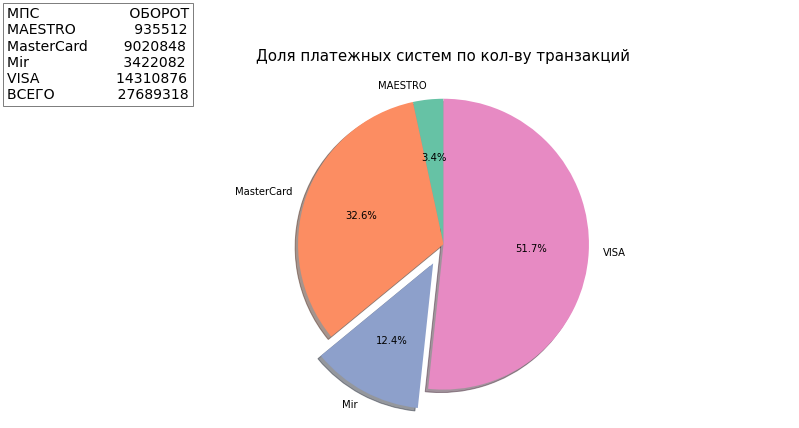

In [43]:
labels = list(source.index.values)
values = [i for i in source.unique()]
explode = (0, 0, .15, 0) 
f, ax = plt.subplots(figsize=[10,5])
ax.pie(values, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.tight_layout()
plt.title('Доля платежных систем по кол-ву транзакций', size=15, pad=25)
plt.text(-3, 1, text, bbox=dict(facecolor='white', alpha=0.5), fontsize=14)
plt.show()

    Здесь можно отметить, что чаще всего используются карты VISA, интересно было бы посмотреть на тенденции измения долей за последние 2-3 года, однако также можно сказать, что карты Мир продолжают показывать увеличение своей доли, что следует из данных в целом по рынку из открытых источников.

Теперь можно обратиться к динамике оборота по платежам, посмотреть на измения и из возможные причины:

In [44]:
hista = data19.groupby('Месяц')['Оборот'].sum().apply(lambda x:round(x,0))
hista.sum()

171310695.0

In [45]:
hista[4:8].values.sum()/hista.sum()

0.5807772013300162

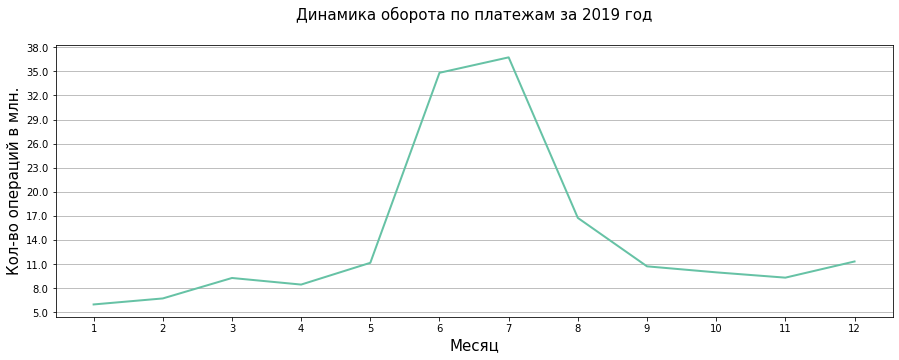

In [46]:
x = [i.month for i in hista.index.to_pydatetime()]
y = [i for i in hista.values]
f, ax = plt.subplots(figsize=[15,5])
plt.plot(x, y, linewidth=2)
plt.title('Динамика оборота по платежам за 2019 год', size=15, pad=25)
plt.xlabel('Месяц', size=15)
plt.ylabel('Кол-во операций в млн.', size=15)
plt.grid(axis='y')
ax.set_yticks([i for i in range(5000000,40000000,3000000)])
ax.set_yticklabels([i/1000000 for i in range(5000000,40000000,3000000)])
ax.set_xticks(range(1,13))
plt.show()

    По графику можно сказать, что на динамику изменения оборота влияет сезонность. Потребитель больше тратит в летний период, а также в праздничные месяца, такие как март и декабрьская предпраздничная суматоха. Общий оборот за 2019 год составил 171 млн рублей, а оборот по операциям за период май-сентябрь составляет почти 60% годового оборота.

Интересно было бы посмотреть на структуру по типу карт, по которым проходят операции:

In [48]:
card_type_debit = data19[(data19['Продукт карты']=='DEBIT')].groupby('Месяц')['Оборот'].sum().apply(lambda x:round(x,0))
card_type_credit = data19[(data19['Продукт карты']=='CREDIT')].groupby('Месяц')['Оборот'].sum().apply(lambda x:round(x,0))
card_type_np = data19[(data19['Продукт карты']=='NOT PRESENT')].groupby('Месяц')['Оборот'].sum().apply(lambda x:round(x,0))
card_type_other = data19[(data19['Продукт карты']=='OTHER')].groupby('Месяц')['Оборот'].sum().apply(lambda x:round(x,0))
card_type_prepaid = data19[(data19['Продукт карты']=='PREPAID')].groupby('Месяц')['Оборот'].sum().apply(lambda x:round(x,0))

In [49]:
products_per_card = data19.groupby('Продукт карты')['Оборот'].sum().apply(lambda x:round(x,0))
products_per_card

Продукт карты
CREDIT          31824032.0
DEBIT          111176008.0
NOT PRESENT      4206276.0
OTHER           21423073.0
PREPAID          2681308.0
Name: Оборот, dtype: float64

In [50]:
products_per_card[1]/products_per_card.sum()

0.6489729476729641

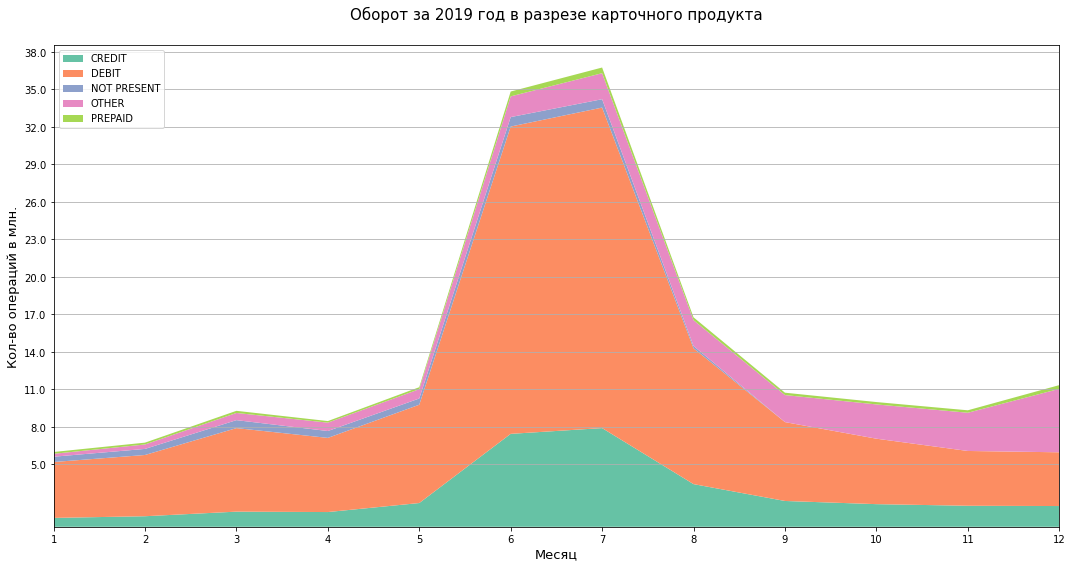

In [51]:
dbt = [i for i in card_type_debit.values]
crd = [i for i in card_type_credit.values]
np = [i for i in card_type_np.values]+[0,0]
othr = [i for i in card_type_other.values]
prp = [i for i in card_type_prepaid.values]

yrs = [i.month for i in hista.index.to_pydatetime()]
 
f, ax = plt.subplots(figsize=(15, 8))
ax.stackplot(yrs, crd, dbt, np, othr, prp, labels=[i for i in products_per_card.index])
ax.set_title('Оборот за 2019 год в разрезе карточного продукта', size=15, pad=25)
ax.set_ylabel('Кол-во операций в млн.', size=13)
ax.set_xlabel('Месяц', size=13)
ax.set_xticks(range(0,13))
ax.set_yticks([i for i in range(5000000,40000000,3000000)])
ax.set_yticklabels([i/1000000 for i in range(5000000,40000000,3000000)])
ax.legend(loc='upper left')
ax.grid(axis='y')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
f.tight_layout()
plt.show()

        Покупатели продолжают активно пользоваться дебетовыми картами, 65% всех операций составляют именно они. Следует заметить, что не смотря на общую тенденцию к увеличению оборота по картам в декабре, кредитные карты не соблюдают ее.  

Посмотрим кто из мерчанитов приносит больше дохода для компании:

In [52]:
mercahnsts = data19.groupby('Мерчант')['Доход от мерчанта'].sum().apply(lambda x:round(x,0)).sort_values(ascending = False)

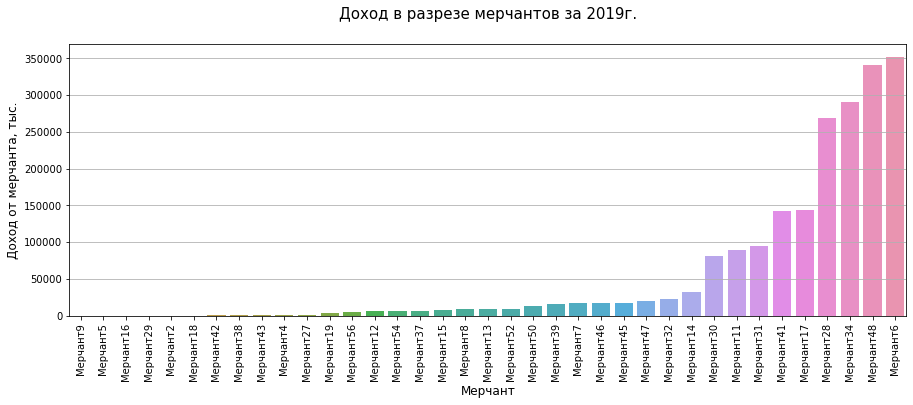

In [53]:
x = [i for i in mercahnsts.index]
y = [i for i in mercahnsts.values]

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x=x, y=y, data=mercahnsts,ci=None)
plt.title('Доход в разрезе мерчантов за 2019г.', size=15, pad=25)
ax.set_xlabel('Мерчант', size=12)
ax.set_ylabel('Доход от мерчанта, тыс.', size=12)
ax.set_xticklabels(mercahnsts.index)
ax.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

    Здесь у нас выделяется примерно 4 группы, если продолжить изучать деятельность по мерчантам, в итоге получится гистограма в соответствии с уровнем бизнеса мерчантов - крутные сети, малый бизнес и тд.

In [54]:
data19.head()

,Месяц,Статус транзакци,Мерчант,Категория мерчанта,Канал,МПС,Продукт карты,Признак карты,Страна карты,Банк rus,Bank eng,Оборот,Количество транзакций,Доход от мерчанта,Расход на МПС,year
1,2019-01-01,65,Мерчант9,Категория1,1105,MasterCard,DEBIT,0.0,643.0,Альфа-банк,JOINT STOCK COMPANY ALFA-BANK,38.382353,1.000000,0.920354,-1.053097,2019
2,2019-01-01,65,Мерчант8,Категория1,1100,VISA,DEBIT,0.0,643.0,NaN,PUBLIC JOINT-STOCK COMPANY BANK OTKRITIE FINAN...,50.000000,11.764706,1.203540,-1.353982,2019
3,2019-01-01,65,Мерчант8,Категория1,1100,VISA,DEBIT,0.0,643.0,Сбербанк России,SBERBANK OF RUSSIA,4.705882,11.764706,0.115044,-0.123894,2019
4,2019-01-01,65,Мерчант13,Категория1,1230,VISA,CREDIT,0.0,643.0,NaN,VTB BANK PJSC,83.864706,23.529412,0.884956,-0.061947,2019
5,2019-01-01,65,Мерчант8,Категория1,1368,MasterCard,DEBIT,0.0,643.0,Сбербанк России,SBERBANK OF RUSSIA,23.823529,17.647059,0.575221,-0.575221,2019


Теперь перейдем к самому интересному - чистой прибыли.

In [55]:
data19['nr'] = data19['Доход от мерчанта'] - data19['Расход на МПС']

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
data19['Доход от мерчанта'].sum()

2023532.849557523

In [57]:
data19['Расход на МПС'].sum()

-1130800.6902654872

In [58]:
data19.nr.sum()

3154333.539823008

In [59]:
nr_year = data19.groupby('Месяц')['nr'].sum().apply(lambda x:round(x,2))
nr_year

Месяц
2019-01-01    202124.88
2019-02-01    182367.09
2019-03-01    235632.12
2019-04-01    227752.57
2019-05-01    234415.97
2019-06-01    349476.79
2019-07-01    339543.12
2019-08-01    414275.42
2019-09-01    292006.05
2019-10-01    222852.85
2019-11-01    196973.51
2019-12-01    256913.18
Name: nr, dtype: float64

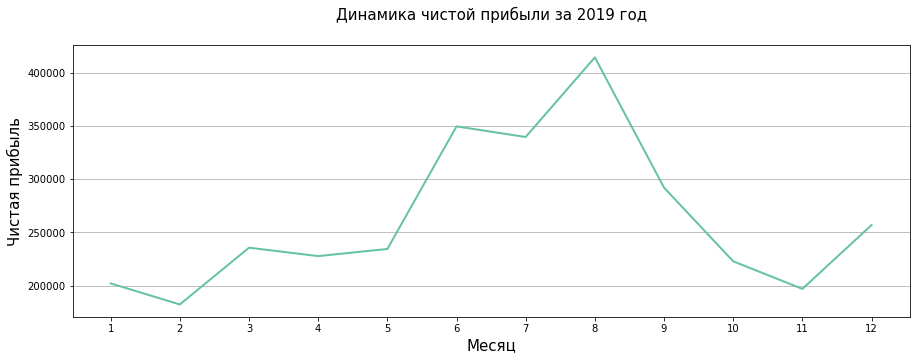

In [60]:
x = [i.month for i in nr_year.index.to_pydatetime()]
y = [i for i in nr_year.values]
f, ax = plt.subplots(figsize=[15,5])
plt.plot(x, y, linewidth=2)
plt.title('Динамика чистой прибыли за 2019 год', size=15, pad=25)
plt.xlabel('Месяц', size=15)
plt.ylabel('Чистая прибыль', size=15)
plt.grid(axis='y')
ax.set_xticks(range(1,13))
plt.show()

Теперь обратимся к категориям мерчантов и посмотрим на выручку, которые они приносят:

In [61]:
nr_by_merch = data19.groupby(['Месяц','Категория мерчанта'])['nr'].sum().apply(lambda x:round(x,2))
nr_by_merch

Месяц       Категория мерчанта
2019-01-01  Категория1            202124.65
            Категория2                 0.23
2019-02-01  Категория1            181178.07
            Категория2                 0.07
            Категория3              1188.95
2019-03-01  Категория1            221430.94
            Категория2                 0.68
            Категория3             14200.50
2019-04-01  Категория1            211148.72
            Категория2               243.55
            Категория3             16360.30
2019-05-01  Категория1            207161.21
            Категория2             12958.12
            Категория3             14296.64
2019-06-01  Категория1            259750.85
            Категория2             78239.26
            Категория3             11486.68
2019-07-01  Категория1            231133.62
            Категория2             77947.36
            Категория3             30462.13
2019-08-01  Категория1            269939.00
            Категория2             32457.04
 

In [62]:
nr_by_merch.sum()

3154333.5500000003

In [63]:
merch_cat = data19.groupby(['Категория мерчанта'])['nr'].sum().apply(lambda x:round(x,2))
merch_cat

Категория мерчанта
Категория1    2446270.23
Категория2     210455.81
Категория3     497607.50
Name: nr, dtype: float64

In [64]:
merch_share = data19.groupby(['Категория мерчанта'])['Оборот'].sum().apply(lambda x:round(x,2))
merch_share

Категория мерчанта
Категория1    95711723.55
Категория2    66087209.75
Категория3     9511762.91
Name: Оборот, dtype: float64

In [65]:
merch_value = data19.groupby(['Категория мерчанта'])['Количество транзакций'].sum().apply(lambda x:round(x,2))
merch_value

Категория мерчанта
Категория1    16266718.65
Категория2     4866705.88
Категория3     6555894.12
Name: Количество транзакций, dtype: float64

In [66]:
merch_rev = data19.groupby(['Категория мерчанта'])['Доход от мерчанта'].sum().apply(lambda x:round(x,2))
merch_rev

Категория мерчанта
Категория1    1766449.33
Категория2      19117.74
Категория3     237965.78
Name: Доход от мерчанта, dtype: float64

1. Увеличен как минимум на дельту, которая компенсирует снижение дохода от мерчантов.
2. Судя по полученным цифрам, необходимо обратить особое внимание 3й группе мерчантов, т.к сформированная в феврале группа показывает уверенный рост показателей кол-ва транзакций и оборота, соответвстенно развитие категории с помощью маркетинговых инструментов должно сказаться на увеличении чистой прибыли за счет увеличение оборота по картам.
3. 497607.50